<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [87]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [88]:
image = np.array(Image.open('./Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





image shape: (100, 100, 3)
img_single_channel shape: (100, 100)


Text(0.5, 1.0, 'Single Channel Image')

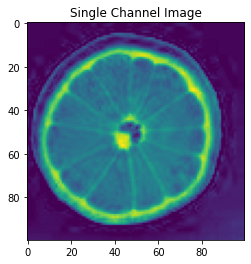

In [89]:
# 1.
print("image shape:", image.shape)
# 2.
img_single_channel = image[:, :, -1]
# 3.
print("img_single_channel shape:", img_single_channel.shape)
# 4.
plt.imshow(img_single_channel)
plt.title("Single Channel Image")

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

img_average_channel shape: (100, 100)


'\nI would say that the average channel image looks better than the single channel \nimage because it has more color and is more vibrant. I am able to see the details \nof the lemon better in the average channel image, more specifically the texture of \nthe lemon.\n'

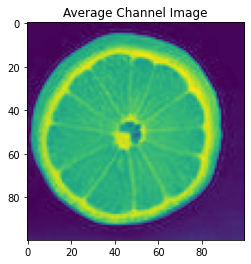

In [90]:
# 1.
img_average_channel = np.mean(image, axis=2)
# 2.
print("img_average_channel shape:", img_average_channel.shape)
# 3.
plt.imshow(img_average_channel)
plt.title("Average Channel Image")
"""
I would say that the average channel image looks better than the single channel 
image because it has more color and is more vibrant. I am able to see the details 
of the lemon better in the average channel image, more specifically the texture of 
the lemon.
"""

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [91]:
# 1.
"""
An identity matrix is a square matrix of size n in which the main diagonal of the 
matrix consists of 1s and the rest of the elements are 0s. Multiplying a matrix by 
an identity matrix results in the same matrix.
"""
# 2.
identity_matrix = np.identity(img_average_channel.shape[0])
print("identity_matrix shape:", identity_matrix.shape)
# 3.
randomRow = np.random.randint(0, identity_matrix.shape[0])
print(f"Row {randomRow}:", identity_matrix[randomRow])
"""
I notice that in each row, there is only one 1 and the rest of the elements are 0s.
"""

identity_matrix shape: (100, 100)
Row 90: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


'\nI notice that in each row, there is only one 1 and the rest of the elements are 0s.\n'

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [92]:
# 1.
rows = np.arange(img_average_channel.shape[0])
# 2.
np.random.shuffle(rows)
# 3.
print(rows)

[66 41 77 99 57 43 46 17 53 69 82 25 71 85 15 13 88 94 32  4 93 91 79 23
 58  8 73 96 29 55 12 38 45 35 59 52  9 42 87 62 31 37 64 30 24 51 47 27
 74 26 97 83 89 63 49 16 36 19 92 67 90 72 84 81 76 70  1 48 95  7 33 14
 68 78  5 61 50 80 10 21  3 86 54 28 56 98 75 20 11 60 39 40 18 22  6 34
 44  2 65  0]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [93]:
# 1.
T = identity_matrix[rows]
randomRow = np.random.randint(0, T.shape[0])
print(f"Row {randomRow}:", T[randomRow])
print("1 found at index", np.where(T[randomRow] == 1)[0][0])
print(f"rows[{randomRow}]:", rows[randomRow])
# 2.
"""
Matrix T is essentially a permutation matrix because there exists one 1 in each row 
and column, and 0s elsewhere.
"""
# 3.
print("T shape:", T.shape)

Row 71: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
1 found at index 14
rows[71]: 14
T shape: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

transformed_image shape: (100, 100)


'\nSince we are multiplying the identity matrix by a permutation matrix, the resulting \nmatrix will be the same of the original image, but in this case, the rows will be \nshuffled since in the rows array, we randomly chose the indices.\n'

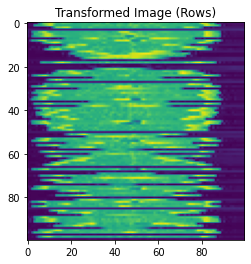

In [94]:
# 1.
transformed_image = np.matmul(T, img_average_channel)
print("transformed_image shape:", transformed_image.shape)
# 2.
plt.imshow(transformed_image)
plt.title("Transformed Image (Rows)")
"""
I notice that the image is the same as the average channel image, but the rows are
shuffled.
"""
# 3.
"""
Since we are multiplying the identity matrix by a permutation matrix, the resulting 
matrix will be the same of the original image, but in this case, the rows will be 
shuffled since in the rows array, we randomly chose the indices.
"""

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

T determinant: 1.0
Tinv shape: (100, 100)


Text(0.5, 1.0, 'Inverse Transformed Image (Rows)')

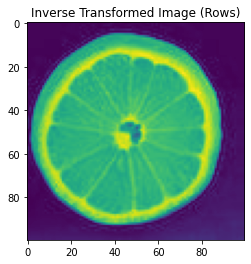

In [95]:
# 1.
"""
Matrix T is invertible, and it is possibly by using numpy.linalg.inv(). We can prove
that it is invertible by checking if the determinant of T is not equal to 0. If the
determinant is not equal to 0, then the matrix is invertible.
"""
# 2.
Tdet = np.linalg.det(T)
print("T determinant:", Tdet)
Tinv = np.linalg.inv(T)
print("Tinv shape:", Tinv.shape)
# 3.
original = np.matmul(Tinv, transformed_image)
plt.imshow(original)
plt.title("Inverse Transformed Image (Rows)")

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


Text(0.5, 1.0, 'Transformed Image (Columns)')

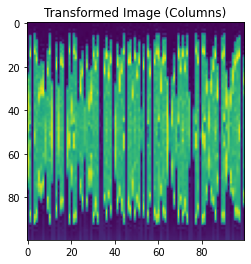

In [96]:
# Get the number of columns in the image
cols = np.arange(img_average_channel.shape[1])

# Shuffle the columns
np.random.shuffle(cols)

# Create a new identity matrix that takes in the shuffled columns
T_cols = identity_matrix[:, cols]

# Multiply the image by the new column-shuffled identity matrix
transformed_image_cols = np.matmul(img_average_channel, T_cols)

# Show the transformed image
plt.imshow(transformed_image_cols)
plt.title("Transformed Image (Columns)")

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

Text(0.5, 1.0, 'Original Image')

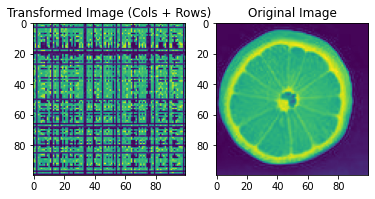

In [97]:
# Scramble the column-shuffled with the row-shuffled identity matrix
colRowScramble = np.matmul(T, transformed_image_cols)

# Get the inverse of the column-shuffled identity matrix
T_cols_inv = np.linalg.inv(T_cols)

# Unscramble the columns of the image
unscrambleCols = np.matmul(colRowScramble, T_cols_inv)

# Unscramble the rows of the unscrambledCols image
unscrambleRows = np.matmul(Tinv, unscrambleCols)

# Show the unscrambled image
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(colRowScramble)
ax2.imshow(unscrambleRows)
ax1.set_title("Transformed Image (Cols + Rows)")
ax2.set_title("Original Image")